In [78]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.cluster import KMeans
#from tensorflow.keras.datasets import mnist
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

In [6]:
df_test = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_test.csv", header=None)
df_train = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_train.csv", header=None)
df_abn = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_abnormal.csv")
df_n = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_normal.csv")

# Perform EDA

Pie chart

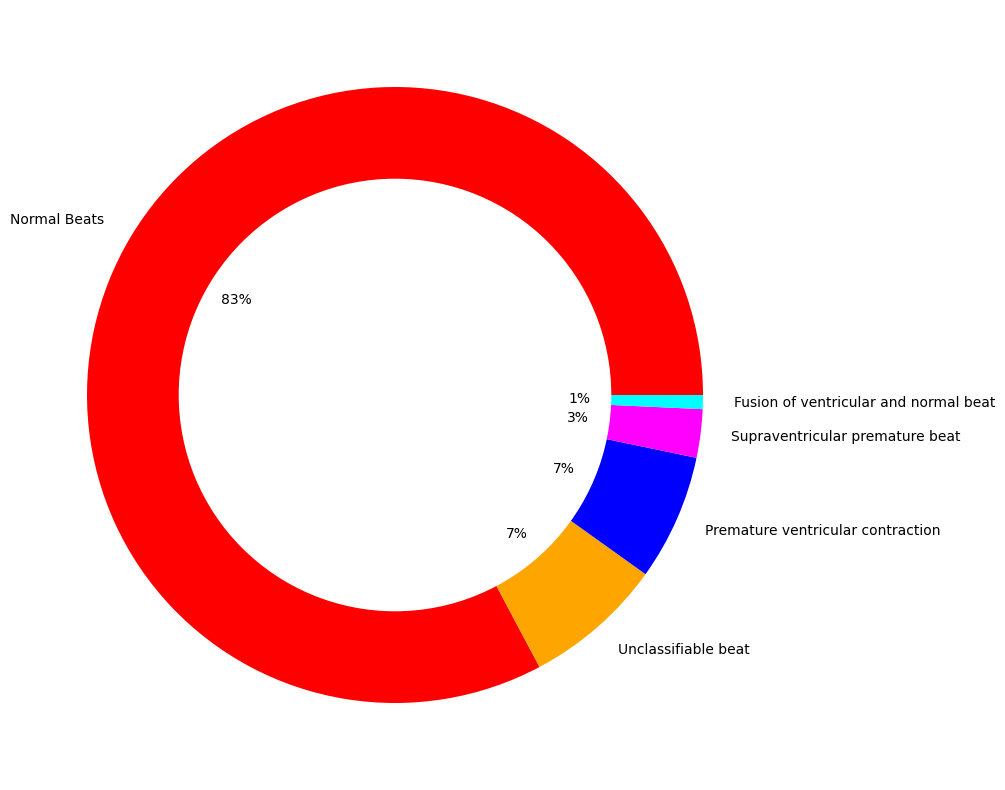

In [7]:

plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df_train[187].value_counts(), labels=['Normal Beats','Unclassifiable beat',
                                            'Premature ventricular contraction',
                                    'Supraventricular premature beat',
                                    'Fusion of ventricular and normal beat'], autopct = '%0.0f%%', 
                                colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


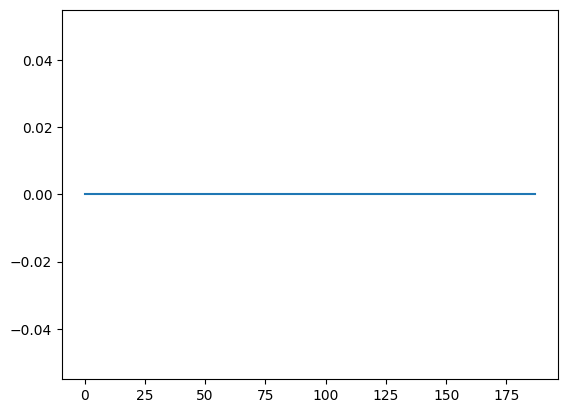

In [4]:
#if there are any NULL values in the dataset
df_train.isnull().sum().plot().legend().set_visible(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


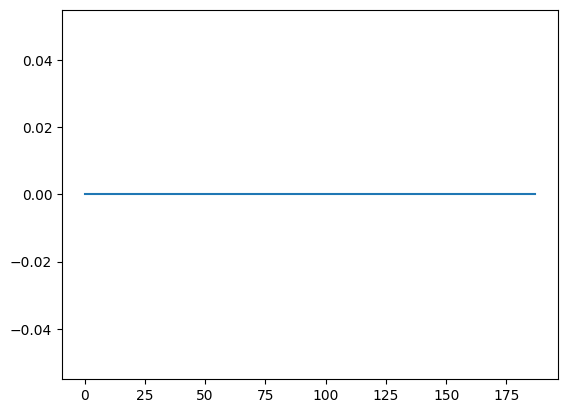

In [5]:
df_test.isnull().sum().plot().legend().set_visible(False)

Shape of datasets

In [6]:
print(df_train.shape)
print(df_test.shape)
print(df_abn.shape)
print(df_n.shape)

(87554, 188)
(21892, 188)
(10505, 188)
(4045, 188)


In [7]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,...,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000
mean,0.894410,0.761902,0.426627,0.221596,0.201676,0.209891,0.204805,0.200992,0.197634,0.196022,...,0.004588,0.004327,0.004020,0.003789,0.003638,0.003459,0.003166,0.003000,0.002946,0.473689
std,0.234560,0.218659,0.228572,0.208711,0.177727,0.172194,0.177946,0.176142,0.170228,0.166707,...,0.043128,0.042187,0.040255,0.039397,0.038535,0.037717,0.035903,0.035522,0.035266,1.143447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924260,0.683366,0.251197,0.050505,0.082873,0.087912,0.072663,0.065997,0.064516,0.068493,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432777,0.167630,0.147642,0.158111,0.144068,0.144509,0.150422,0.149029,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912319,0.583991,0.347092,0.259211,0.287356,0.298453,0.294563,0.289907,0.282956,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


copied datsets to another datframe 👇

In [3]:
df1 = df_train
df2 = df_test

Giving name to the columns

In [5]:
# Giving name to the columns
#df_train, df_test

m,n = df1.shape
#m,n = df2.shape
print(m,n)
col_name = []
for i in range(n):
    if i == n-1:
        col_name.append('target')
    else:
        col_name.append('feature'+str(i))
df1.columns = col_name
#df2.columns = col_name

87554 188


In [12]:
df_train.corr()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,target
feature0,1.000000,0.778516,0.141264,-0.134788,-0.243921,-0.352727,-0.430698,-0.480058,-0.521888,-0.559848,...,-0.051550,-0.044223,-0.039223,-0.035047,-0.035090,-0.035739,-0.035559,-0.033901,-0.032958,-0.166175
feature1,0.778516,1.000000,0.501528,-0.024286,-0.148470,-0.164901,-0.234436,-0.285260,-0.322706,-0.341306,...,-0.019324,-0.013356,-0.009154,-0.007511,-0.008674,-0.010175,-0.010693,-0.010116,-0.009987,-0.183442
feature2,0.141264,0.501528,1.000000,0.672398,0.402170,0.345925,0.281478,0.206464,0.138555,0.077503,...,-0.018531,-0.020627,-0.021478,-0.025592,-0.029119,-0.030466,-0.031462,-0.033109,-0.034741,0.252175
feature3,-0.134788,-0.024286,0.672398,1.000000,0.819907,0.596827,0.475922,0.389027,0.292549,0.199308,...,-0.017025,-0.024396,-0.028907,-0.036101,-0.041249,-0.042956,-0.043560,-0.045399,-0.046860,0.508486
feature4,-0.243921,-0.148470,0.402170,0.819907,1.000000,0.881908,0.750680,0.663960,0.563274,0.448298,...,0.020470,0.010719,0.003458,-0.006081,-0.012639,-0.015318,-0.016064,-0.019551,-0.020914,0.508453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature183,-0.035739,-0.010175,-0.030466,-0.042956,-0.015318,0.005908,0.005361,0.015440,0.023275,0.016165,...,0.738338,0.783177,0.832193,0.895911,0.958530,1.000000,0.953214,0.893247,0.855729,0.037706
feature184,-0.035559,-0.010693,-0.031462,-0.043560,-0.016064,0.004372,0.003806,0.014076,0.022634,0.015333,...,0.714502,0.753969,0.796068,0.848370,0.903837,0.953214,1.000000,0.948725,0.904684,0.038890
feature185,-0.033901,-0.010116,-0.033109,-0.045399,-0.019551,0.000171,0.000038,0.010937,0.020454,0.012894,...,0.693137,0.727363,0.764190,0.809050,0.852634,0.893247,0.948725,1.000000,0.965155,0.038924
feature186,-0.032958,-0.009987,-0.034741,-0.046860,-0.020914,-0.001334,-0.001226,0.010157,0.020295,0.012735,...,0.679757,0.711386,0.744049,0.783552,0.822765,0.855729,0.904684,0.965155,1.000000,0.038146


In [ ]:
df_train
#df_test
#df1
#df2

In [ ]:
df1.iloc[500:550,130:145]

In [ ]:
df1.columns

In [ ]:
df1.info()

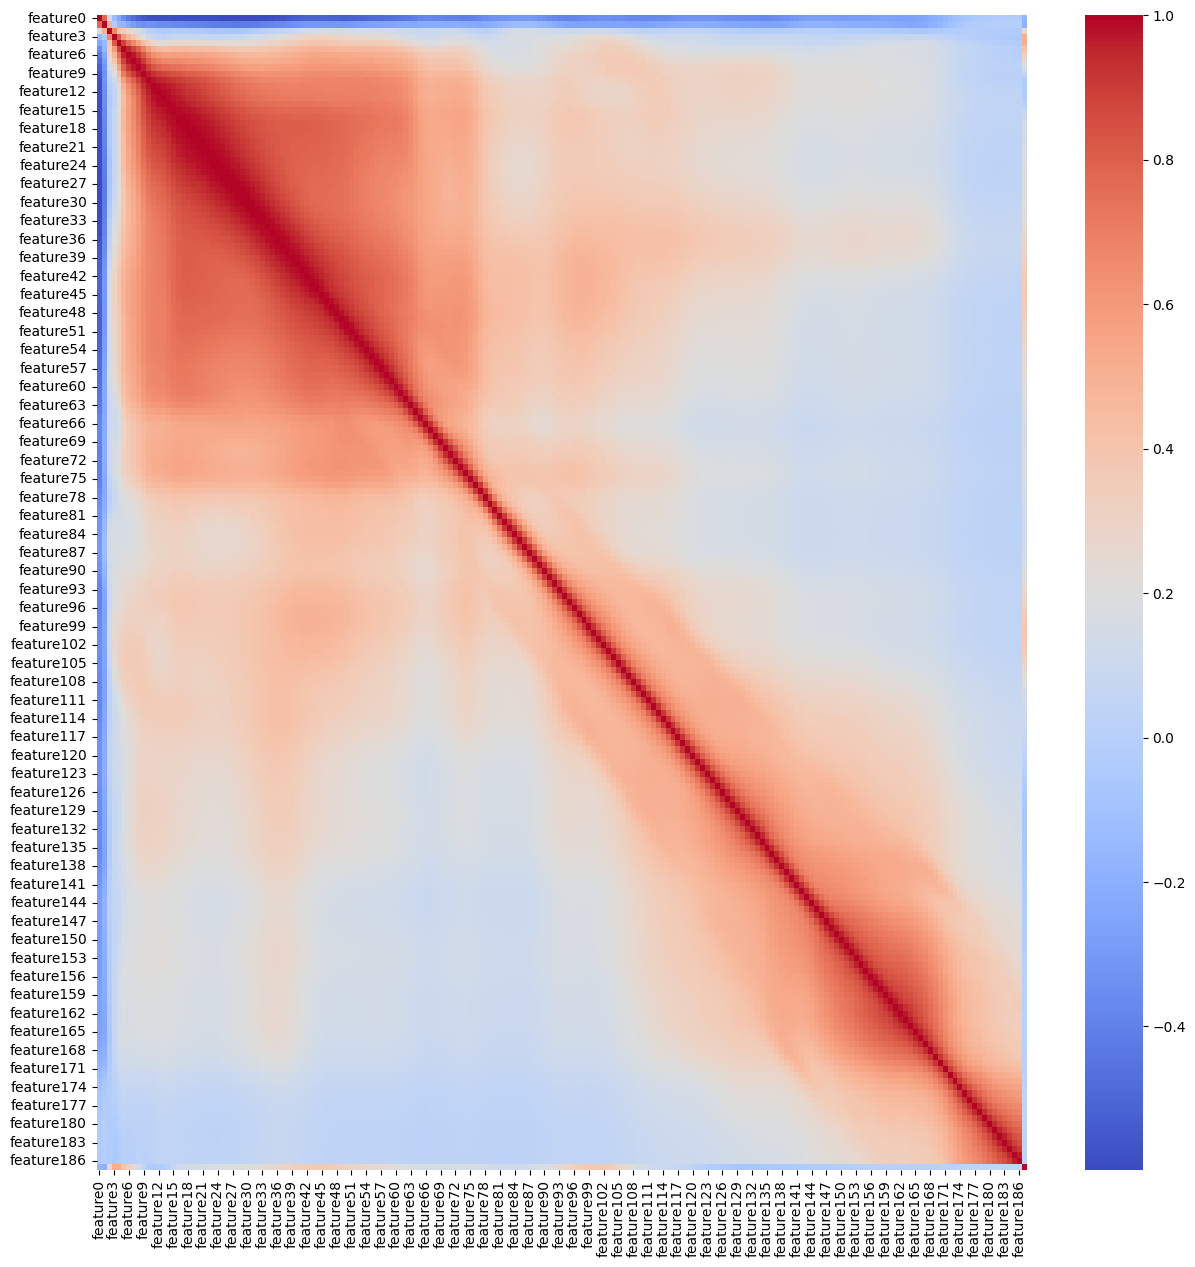

In [13]:
corr = df1.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

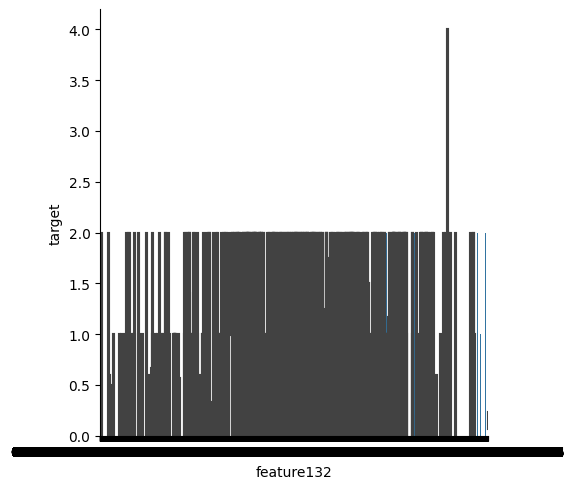

In [90]:
sns.catplot(data=df1, x="feature132", y="target", kind='bar')

<Axes: xlabel='feature69', ylabel='Density'>

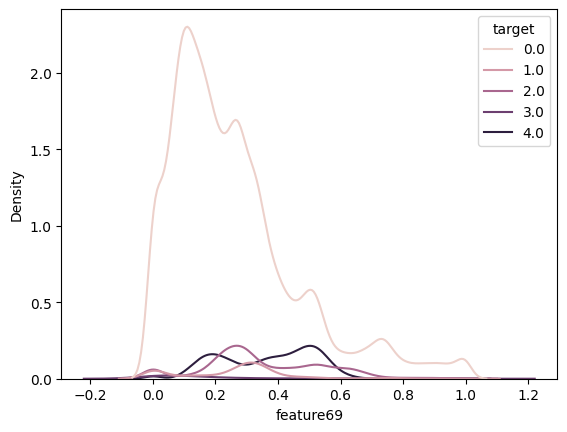

In [19]:
sns.kdeplot(data = df1, x = 'feature69', hue = 'target')

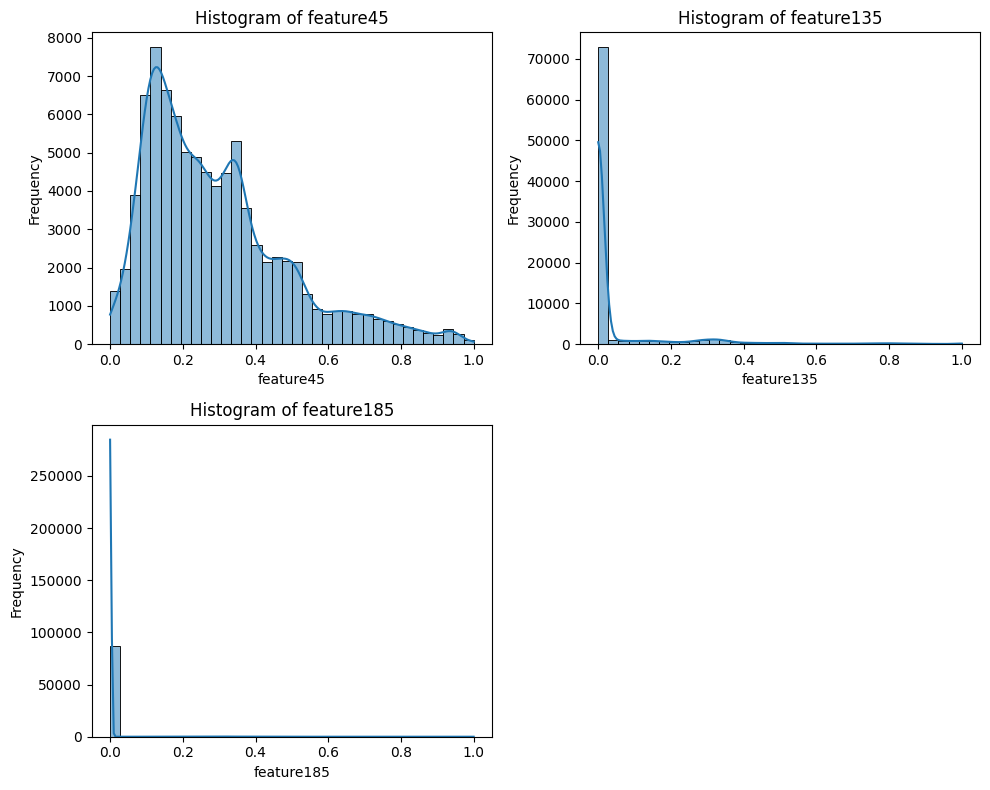

In [20]:
subset_features = ['feature45', 'feature135', 'feature185']  
n = len(subset_features)
cols = 2
rows = (n//cols)+(n%cols>0)

plt.figure(figsize=(10, 4 * rows))

for i, feature in enumerate(subset_features, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df1[feature], kde=True, bins=36) #type: ignore
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

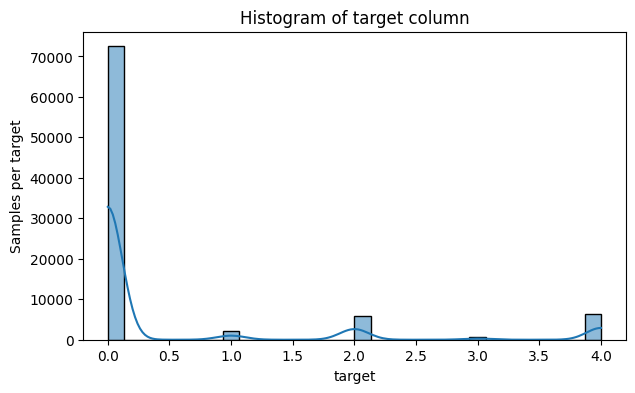

In [14]:
target_col = 'target'
plt.figure(figsize=(7, 4))
sns.histplot(df1["target"], kde=True, bins=30)  #type: ignore
plt.title(f'Histogram of {target_col} column')
plt.xlabel(target_col)
plt.ylabel('Samples per target')
plt.show()

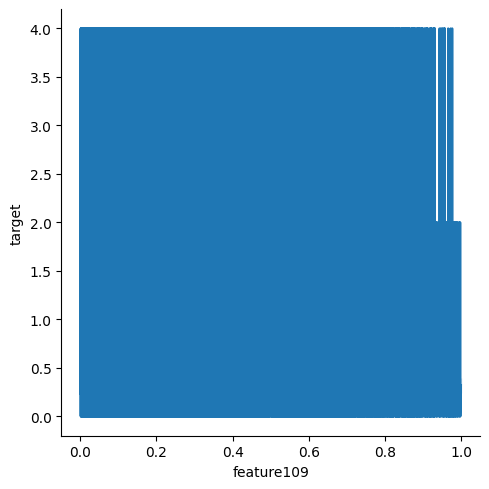

In [15]:
sns.relplot(data=df1, x = "feature109", y = "target", kind="line")

In [22]:
#print(df1.iloc[:,:-1].shape)
X_df1 = df1.iloc[:,:-1]
y_df1 = df1.iloc[:,-1:]
print(X_df1.shape, y_df1.shape)
y_df1['target'].unique()

array([0., 1., 2., 3., 4.])

In [24]:
df1_cats = {}

categories = df1['target'].unique()
for category in categories:
    df1_cats[category] = df_train[df_train['target'] == category]

df1_cats.keys()

In [26]:
k_df1 = len(df1_cats)
k_df1, df1_cats.keys()

(5, dict_keys([0.0, 1.0, 2.0, 3.0, 4.0]))

In [27]:
df1_cats_1 = df1_cats[0]
df1_cats_2 = df1_cats[1]
df1_cats_3 = df1_cats[2]
df1_cats_4 = df1_cats[3]
df1_cats_5 = df1_cats[4]

df1_cats_1.shape, df1_cats_2.shape, df1_cats_3.shape, df1_cats_4.shape, df1_cats_5.shape

In [29]:
df1_cats_concat = pd.concat([df1_cats_1, df1_cats_2, df1_cats_3, df1_cats_4, df1_cats_5], axis=0)

In [40]:
df1_cats_concat['feature131'].unique() 

array([0.05413105, 0.        , 0.10798122, ..., 0.6356073 , 0.65864664,
       0.6306991 ])

In [ ]:
df1_cats_concat.describe()

In [ ]:

target = df1.columns[-1]

plt.figure(figsize=(15,8))

for feature in X_df1.columns:  
    plt.scatter(df1[feature], df1[target],
                label = feature)
    
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("Target vs Features")
plt.legend().set_visible(False)  
plt.show()

In [13]:
df_train_unique = df_train.iloc[:,-1].unique()
df_train_unique, df_train.shape

(array([0., 1., 2., 3., 4.]), (87553, 188))

In [ ]:
df_train.isnull().sum() 

In [ ]:
df_train.describe()#.iloc[:,80:100]

In [15]:
stats = df_train.describe()
spc_stats = stats.loc[['mean', 'std','25%','50%','75%']]
#print(spc_stats)

In [ ]:
spc_stats.plot().legend().set_visible(False)

In [ ]:
df_test

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.describe()

In [14]:
df_test_unique = df_test.iloc[:,-1].unique()
df_test_unique, df_test.shape

(array([0., 1., 2., 3., 4.]), (21891, 188))

In [23]:
stats2 = df_test.describe()
spc_stats2 = stats2.loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats2.plot().legend().set_visible(False)

In [46]:
#sns.boxplot(x=df_train.iloc[180]) 

# Finding Outliers 

In [29]:
from scipy import stats

Z-Score

In [30]:
z_scores = stats.zscore(df_train, axis = 1)
outliers_mask = (np.abs(z_scores)>3).any(axis = 1)
outliers = df_train[outliers_mask]

In [ ]:
outliers.describe()

In [ ]:
#print(outliers.shape)
#outliers.iloc[:,:].plot().legend().set_visible(False)

Interquartile Range (IQR)

In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

outliers_bool = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))

outliers_count_per_column = outliers_bool.sum()
count = 0
for i in range(len(outliers_count_per_column)):
    if outliers_count_per_column.iloc[i] > 0:
        count+=1
        print(outliers_count_per_column.iloc[i])
print(f"No. of Columns with ouliers: {count}")

In [ ]:
rows_with_outliers = outliers_bool.any(axis=1)
outliers_2 = df_train[rows_with_outliers]
outliers_2


In [ ]:
outliers_2.describe()

In [111]:
#outliers_2.plot().legend().set_visible(False)

The df_train is labeled because the last column of dftrain has 5 unique values. And about unique values in this case that's not so important

# Apply Supervised learning

## MIT_BIH

In [7]:
print(df_train.shape, df1.shape)
#df_train

(87554, 188) (87554, 188)


Split category features 

In [9]:
X1  = df_train.iloc[:,:-1]
y1 = df_train.iloc[:,-1]

Sapmpling Class

In [10]:
class Samplingdata:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def smote(self):
        smote = SMOTE(random_state=42, k_neighbors=3)#, n_jobs=-1
        X_smote, y_smote = smote.fit_resample(self.X, self.y)#type: ignore
        return X_smote, y_smote
    def tomek(self):
        tomek = TomekLinks()
        X_tomek, y_tomek = tomek.fit_resample(self.X, self.y)#type: ignore
        return X_tomek, y_tomek
    def smote_tomek(self):
        smt = SMOTETomek(random_state=42)
        X_smt, y_smt = smt.fit_resample(self.X, self.y)#type: ignore
        return X_smt, y_smt

Model Class

In [11]:
class Model:
    def __init__ (self, model, X_train, X_test, y_train, y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    def model_fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    def model_report(self, y_pred, y_test):
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred, normalize='true')
        classification = classification_report(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1Score = f1_score(y_test, y_pred, average='weighted')
        return accuracy, confusion, classification, recall, precision, f1Score
    def model_pred(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

In [12]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X1, y1, test_size=0.2, random_state=42)

Sampling X, y

In [23]:
X1_oversample, y1_oversample = Samplingdata(X1, y1).smote()
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X1_oversample, y1_oversample, test_size=0.2, random_state=42, stratify=y1_oversample)

In [22]:
X1_undersample, y1_undersample = Samplingdata(X1, y1).tomek()
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X1_undersample, y1_undersample, test_size=0.2, random_state=42, stratify=y1_undersample)

In [21]:
X1_Smotek, y1_Smotek = Samplingdata(X1, y1).smote_tomek()
X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek = train_test_split(X1_Smotek, y1_Smotek, test_size=0.2, random_state=42, stratify=y1_Smotek)

Logistic Regression

In [13]:
model_logistic_reg = LogisticRegression(random_state=42, max_iter=100, multi_class='auto', solver='liblinear')

In [28]:
MyModel1 = Model(model_logistic_reg, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
MyModel1.model_fit(X_train_smote,  y_train_smote)

In [29]:
prediction1 = MyModel1.model_pred(X_test_smote)
model_accu_1, model_con_mat_1, model_cl_report_1, model_recall_1, model_precision_1, model_F1_1 = MyModel1.model_report(prediction1, y_test_smote)

In [15]:
Model2 = Model(model_logistic_reg, X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek)
Model2.model_fit(X_train_tomek, y_train_tomek)

In [16]:
prediction2 = Model2.model_pred(X_test_tomek)
model_accu_2, model_con_mat_2, model_cl_report_2, model_recall_2, model_precision_2, model_F1_2 = Model2.model_report(prediction2, y_test_tomek)

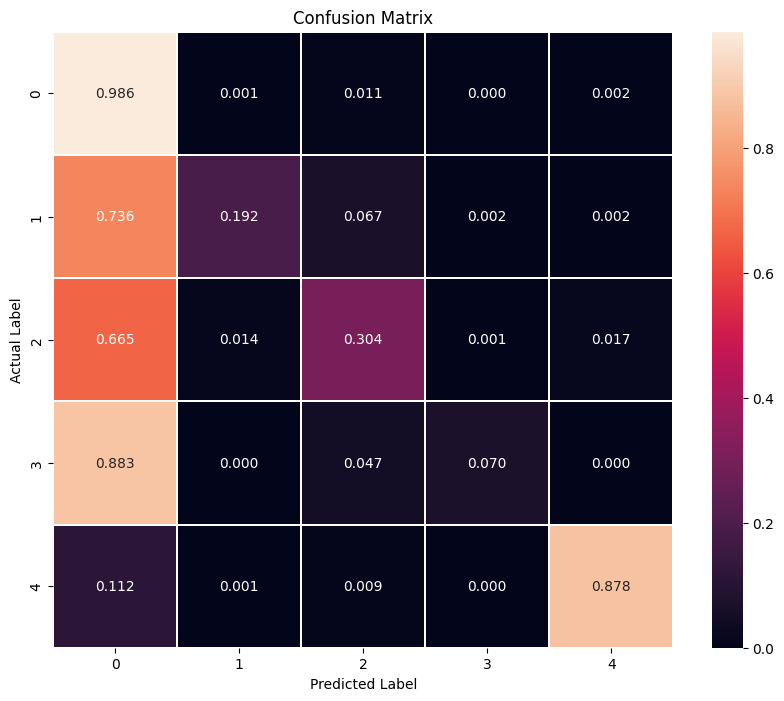

In [17]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_2, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

👆 Model Gets Biased if Undersampled 👆

In [32]:
Model3 = Model(model_logistic_reg, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model3.model_fit(X_train_smotek, y_train_smotek)

In [33]:
prediction3 = Model3.model_pred(X_test_smotek)
model_accu_3, model_con_mat_3, model_cl_report_3, model_recall_3, model_precision_3, model_F1_3 = Model3.model_report(prediction3, y_test_smotek)

In [34]:
print(f"accuracy is: {model_accu_3}")
print(f"Precision: {model_precision_3}")
print(f"Recall: {model_recall_3}")
print(f"F1_Score: {model_F1_3}")
print(f"confusion_matrix:\n {np.around(model_con_mat_3, decimals=2)}")
print(f"classification:\n {model_cl_report_3}")

accuracy is: 0.784976059389273
Precision: 0.7865507610345313
Recall: 0.784976059389273
F1_Score: 0.7848809113783082
confusion_matrix:
 [[0.63 0.12 0.13 0.08 0.03]
 [0.21 0.73 0.03 0.02 0.01]
 [0.1  0.03 0.75 0.09 0.03]
 [0.06 0.   0.05 0.89 0.  ]
 [0.03 0.   0.04 0.01 0.92]]
classification:
               precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     14494
         1.0       0.82      0.73      0.77     14494
         2.0       0.75      0.75      0.75     14494
         3.0       0.82      0.89      0.85     14495
         4.0       0.93      0.92      0.93     14494

    accuracy                           0.78     72471
   macro avg       0.79      0.78      0.78     72471
weighted avg       0.79      0.78      0.78     72471



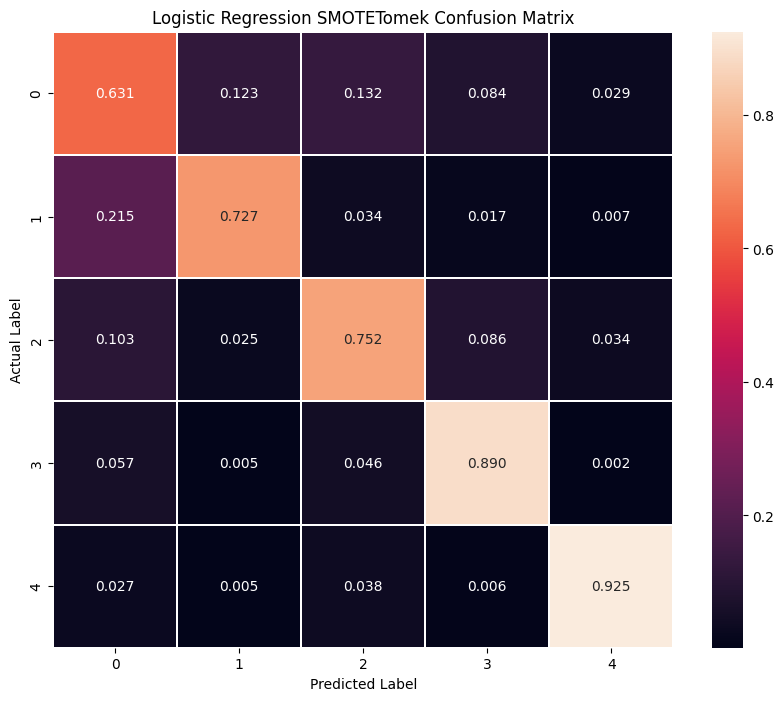

In [40]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_3, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Logistic Regression SMOTETomek Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###### Test models (Data-split)

In [52]:
X_df_test = df_test.iloc[:,:-1]
y_df_test = df_test.iloc[:,-1]

In [53]:
Smotek_X_df_test, Smotek_y_df_test = Samplingdata(X_df_test, y_df_test).smote_tomek()

testing (logistic regrssion)

In [128]:
predict_logisticReg = Model3.model_pred(Smotek_X_df_test)

In [129]:
accu_logisticreg, conf_mat_logisticreg, cl_report_logisticreg, recall_logisticreg, precision_logisticreg, F1_logisticreg = Model3.model_report(predict_logisticReg, Smotek_y_df_test)

In [130]:
print(f"accuracy is: {accu_logisticreg}")
print(f"Precision: {precision_logisticreg}")
print(f"Recall: {recall_logisticreg}")
print(f"F1_Score: {F1_logisticreg}")
print(f"confusion_matrix:\n {np.around(conf_mat_logisticreg, decimals=3)}")
print(f"classification:\n {cl_report_logisticreg}")

accuracy is: 0.7740368694116349
Precision: 0.7761004215354605
Recall: 0.7740368694116349
F1_Score: 0.7734854727325999
confusion_matrix:
 [[0.634 0.122 0.126 0.085 0.033]
 [0.242 0.692 0.04  0.018 0.008]
 [0.104 0.033 0.718 0.109 0.036]
 [0.054 0.    0.052 0.893 0.   ]
 [0.025 0.005 0.032 0.006 0.932]]
classification:
               precision    recall  f1-score   support

         0.0       0.60      0.63      0.62     18118
         1.0       0.81      0.69      0.75     18118
         2.0       0.74      0.72      0.73     18118
         3.0       0.80      0.89      0.85     18118
         4.0       0.92      0.93      0.93     18118

    accuracy                           0.77     90590
   macro avg       0.78      0.77      0.77     90590
weighted avg       0.78      0.77      0.77     90590



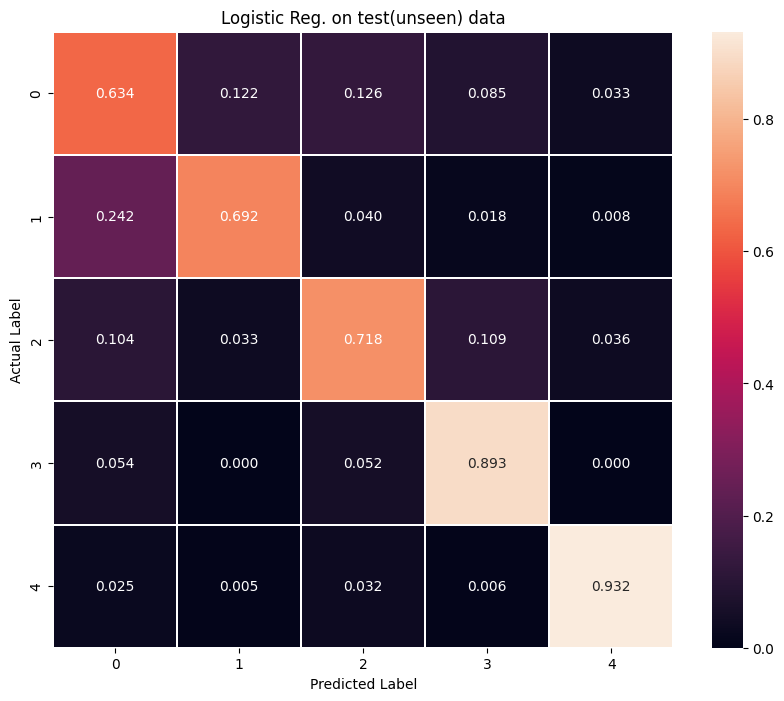

In [131]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_logisticreg, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Logistic Reg. on test(unseen) data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Decision Tree

In [45]:
#model_decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, random_state=0, min_samples_leaf=5, min_samples_split=2)
model_decision_tree = DecisionTreeClassifier(random_state=0)

In [46]:
Model4 = Model(model_decision_tree, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model4.model_fit(X_train_smotek,  y_train_smotek)

In [47]:
prediction4 = Model4.model_pred(X_test_smotek)
model_accu_4, model_con_mat_4, model_cl_report_4, model_recall_4, model_precision_4, model_F1_4 = Model4.model_report(prediction4, y_test_smotek)

In [48]:
print(f"accuracy is: {model_accu_4}")
print(f"Precision: {model_precision_4}")
print(f"Recall: {model_recall_4}")
print(f"F1_Score: {model_F1_4}")
print(f"confusion_matrix:\n {np.around(model_con_mat_4, decimals=3)}")
print(f"classification:\n {model_cl_report_4}")

accuracy is: 0.9812200742365912
Precision: 0.9811678214639535
Recall: 0.9812200742365912
F1_Score: 0.9811563286829303
confusion_matrix:
 [[0.947 0.023 0.016 0.007 0.006]
 [0.015 0.983 0.001 0.    0.   ]
 [0.008 0.001 0.986 0.003 0.002]
 [0.002 0.    0.002 0.996 0.   ]
 [0.003 0.001 0.002 0.    0.994]]
classification:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     14494
         1.0       0.97      0.98      0.98     14494
         2.0       0.98      0.99      0.98     14494
         3.0       0.99      1.00      0.99     14495
         4.0       0.99      0.99      0.99     14494

    accuracy                           0.98     72471
   macro avg       0.98      0.98      0.98     72471
weighted avg       0.98      0.98      0.98     72471



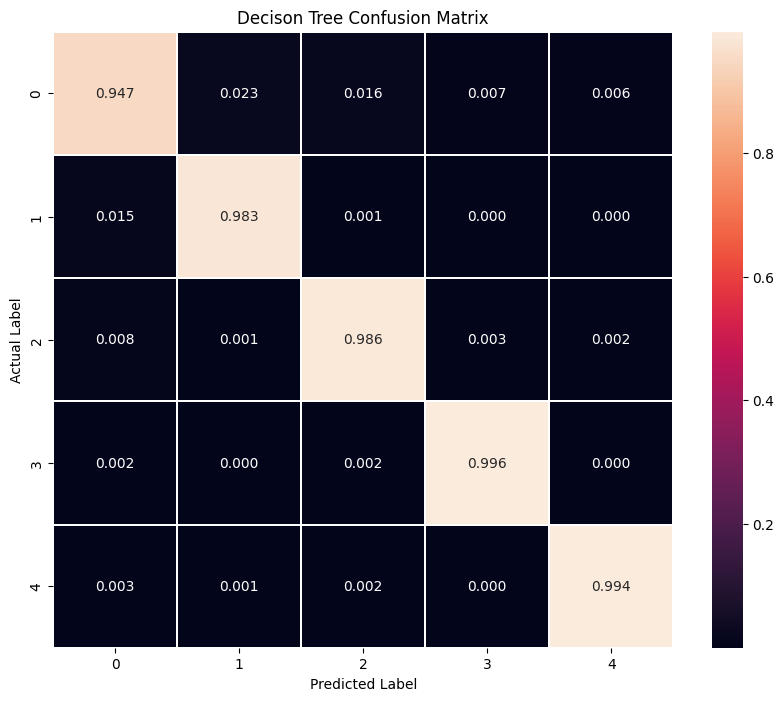

In [49]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_4, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Decison Tree Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

testing (Decision Tree)

In [58]:
predict_raw_decisionTree = Model4.model_pred(X_df_test)

In [59]:
accu_decision, con_mat_decision, cl_report_decision, recall_decision, precision_decision, F1_decision = Model4.model_report(predict_raw_decisionTree, y_df_test)

In [60]:
print(f"accuracy is: {accu_decision}")
print(f"Precision: {precision_decision}")
print(f"Recall: {recall_decision}")
print(f"F1_Score: {F1_decision}")
print(f"confusion_matrix:\n {np.around(con_mat_decision, decimals=3)}")
print(f"classification:\n {cl_report_decision}")

accuracy is: 0.9326694682989219
Precision: 0.9455209208845541
Recall: 0.9326694682989219
F1_Score: 0.9374665771273839
confusion_matrix:
 [[0.943 0.025 0.017 0.007 0.007]
 [0.234 0.718 0.029 0.011 0.009]
 [0.076 0.008 0.886 0.02  0.01 ]
 [0.173 0.012 0.093 0.704 0.019]
 [0.027 0.003 0.014 0.001 0.955]]
classification:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     18118
         1.0       0.46      0.72      0.56       556
         2.0       0.78      0.89      0.83      1448
         3.0       0.41      0.70      0.52       162
         4.0       0.91      0.95      0.93      1608

    accuracy                           0.93     21892
   macro avg       0.71      0.84      0.76     21892
weighted avg       0.95      0.93      0.94     21892



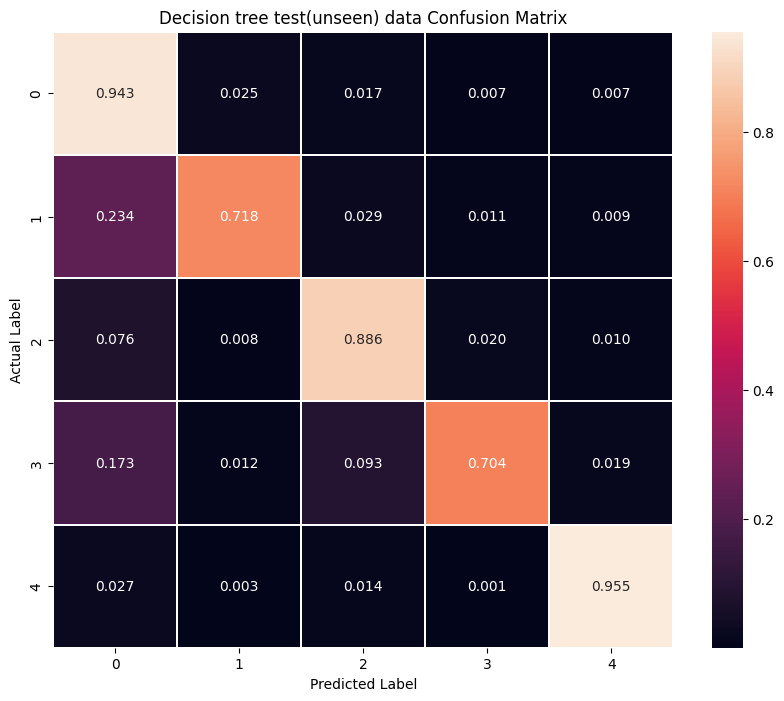

In [61]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_mat_decision, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Decision tree test(unseen) data Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [83]:
#df1.describe()

In [132]:
#scaler_df1 = StandardScaler().fit(df1)

In [133]:
#scaled_df1_features = scaler_df1.transform(df1)

LinearSVC

In [37]:
model_linear_svc = LinearSVC(random_state=42, max_iter=5000, dual = True)

In [38]:
Model5 = Model(model_linear_svc, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model5.model_fit(X_train_smotek, y_train_smotek)

In [39]:
prediction5 = Model5.model_pred(X_test_smotek)
model_accu_5, model_con_mat_5, model_cl_report_5, model_recall_5, model_precision_5, model_F1_5 = Model5.model_report(prediction5, y_test_smotek)

In [40]:
print(f"accuracy is: {model_accu_5}")
print(f"Precision: {model_precision_5}")
print(f"Recall: {model_recall_5}")
print(f"F1_Score: {model_F1_5}")
print(f"confusion_matrix:\n {np.around(model_con_mat_5, decimals=3)}")
print(f"classification:\n {model_cl_report_5}")

accuracy is: 0.7825613003822218
Precision: 0.7834751403254872
Recall: 0.7825613003822218
F1_Score: 0.7820879218038533
confusion_matrix:
 [[0.62  0.125 0.131 0.093 0.031]
 [0.218 0.723 0.035 0.015 0.008]
 [0.106 0.029 0.749 0.085 0.031]
 [0.05  0.004 0.048 0.897 0.002]
 [0.026 0.005 0.038 0.007 0.924]]
classification:
               precision    recall  f1-score   support

         0.0       0.61      0.62      0.61     14494
         1.0       0.82      0.72      0.77     14494
         2.0       0.75      0.75      0.75     14494
         3.0       0.82      0.90      0.86     14495
         4.0       0.93      0.92      0.93     14494

    accuracy                           0.78     72471
   macro avg       0.78      0.78      0.78     72471
weighted avg       0.78      0.78      0.78     72471



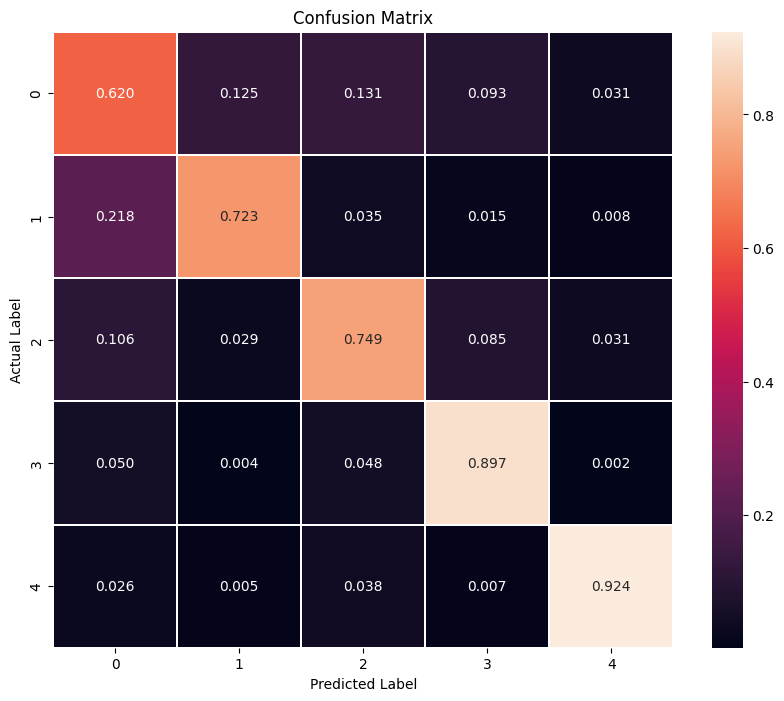

In [41]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_5, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

testing (linear SVC)

In [42]:
predict_raw_linear_svc = Model5.model_pred(X_df_test)

In [43]:
accu_linearSVC, con_mat_linearSVC, cl_report_linearSVC, recall_linearSVC, precision_linearSVC, F1_linearSVC = Model5.model_report(predict_raw_linear_svc, y_df_test)

In [44]:
print(f"accuracy is: {accu_linearSVC}")
print(f"Precision: {precision_linearSVC}")
print(f"Recall: {recall_linearSVC}")
print(f"F1_Score: {F1_linearSVC}")
print(f"confusion_matrix:\n {np.around(con_mat_linearSVC, decimals=3)}")
print(f"classification:\n {cl_report_linearSVC}")

accuracy is: 0.6552165174492965
Precision: 0.8783090079800959
Recall: 0.6552165174492965
F1_Score: 0.7223031102023044
confusion_matrix:
 [[0.625 0.122 0.124 0.094 0.034]
 [0.241 0.655 0.059 0.031 0.014]
 [0.106 0.036 0.706 0.113 0.039]
 [0.056 0.006 0.062 0.877 0.   ]
 [0.024 0.007 0.037 0.009 0.922]]
classification:
               precision    recall  f1-score   support

         0.0       0.97      0.63      0.76     18118
         1.0       0.14      0.65      0.23       556
         2.0       0.30      0.71      0.42      1448
         3.0       0.07      0.88      0.13       162
         4.0       0.69      0.92      0.79      1608

    accuracy                           0.66     21892
   macro avg       0.43      0.76      0.47     21892
weighted avg       0.88      0.66      0.72     21892



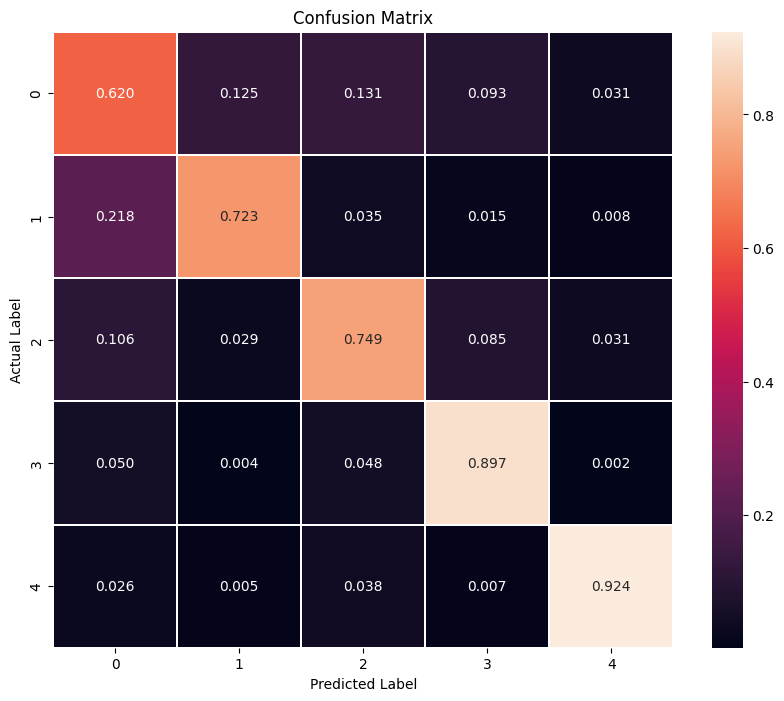

In [45]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_5, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

SVM

###### It took approx 120+ minutes to converge!!!

In [10]:
model_SVM = SVC(random_state=42, kernel='rbf', C=1.0, gamma='auto')
#model_SVM = SVC(random_state=42)

In [11]:
Model6 = Model(model_SVM, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model6.model_fit(X_train_smotek, y_train_smotek)

In [12]:
prediction6 = Model6.model_pred(X_test_smotek)
model_accu_6, model_con_mat_6, model_cl_report_6, model_recall_6, model_precision_6, model_F1_6 = Model6.model_report(prediction6, y_test_smotek)

In [13]:
print(f"accuracy is: {model_accu_6}")
print(f"Precision: {model_precision_6}")
print(f"Recall: {model_recall_6}")
print(f"F1_Score: {model_F1_6}")
print(f"confusion_matrix:\n {np.around(model_con_mat_6, decimals=3)}")
print(f"classification:\n {model_cl_report_6}")

accuracy is: 0.8502828756726921
Precision: 0.8653435650198362
Recall: 0.8502828756726921
F1_Score: 0.8530994329451193
confusion_matrix:
 [[0.82  0.037 0.054 0.072 0.016]
 [0.236 0.729 0.018 0.014 0.003]
 [0.07  0.005 0.878 0.043 0.005]
 [0.071 0.002 0.027 0.897 0.003]
 [0.054 0.001 0.012 0.006 0.927]]
classification:
               precision    recall  f1-score   support

         0.0       0.66      0.82      0.73     14494
         1.0       0.94      0.73      0.82     14494
         2.0       0.89      0.88      0.88     14494
         3.0       0.87      0.90      0.88     14494
         4.0       0.97      0.93      0.95     14494

    accuracy                           0.85     72470
   macro avg       0.87      0.85      0.85     72470
weighted avg       0.87      0.85      0.85     72470



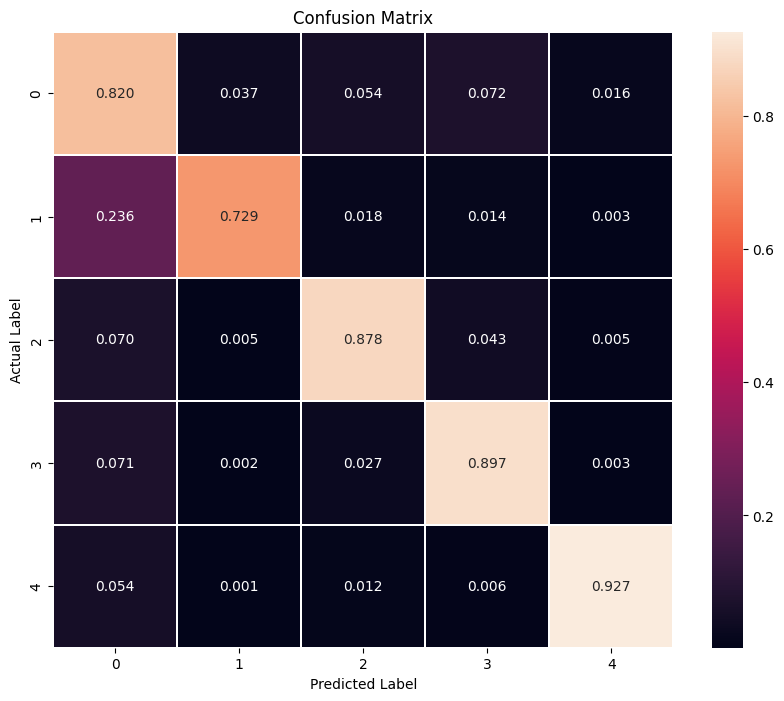

In [14]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_6, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

testing SVM

In [44]:
predict_SVM = Model6.model_pred(X_df_test)

In [45]:
accu_SVM, con_mat_SVM, cl_report_SVM, recall_SVM, precision_SVM, F1_score_SVM = Model6.model_report(predict_SVM, y_df_test)

In [46]:
print(f"accuracy is: {accu_SVM}")
print(f"Precision: {precision_SVM}")
print(f"Recall: {recall_SVM}")
print(f"F1_Score: {F1_score_SVM}")
print(f"confusion_matrix:\n {np.around(con_mat_SVM, decimals=3)}")
print(f"classification:\n {cl_report_SVM}")

accuracy is: 0.8280115115801014
Precision: 0.9140681842721611
Recall: 0.8280115115801014
F1_Score: 0.8594129419890175
confusion_matrix:
 [[0.822 0.036 0.053 0.07  0.019]
 [0.254 0.683 0.027 0.029 0.007]
 [0.071 0.008 0.855 0.061 0.005]
 [0.056 0.006 0.043 0.895 0.   ]
 [0.06  0.002 0.016 0.005 0.917]]
classification:
               precision    recall  f1-score   support

         0.0       0.98      0.82      0.89     18117
         1.0       0.36      0.68      0.47       556
         2.0       0.55      0.85      0.67      1448
         3.0       0.10      0.90      0.17       162
         4.0       0.80      0.92      0.86      1608

    accuracy                           0.83     21891
   macro avg       0.56      0.83      0.61     21891
weighted avg       0.91      0.83      0.86     21891



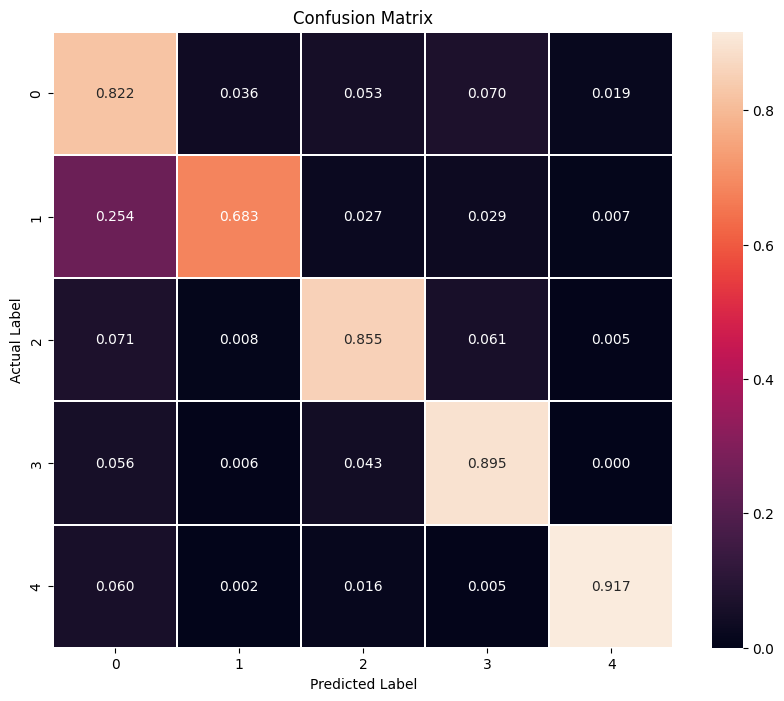

In [47]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_mat_SVM, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

k-nearest

In [62]:
model_k_nearest = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

In [63]:
Model7 = Model(model_k_nearest, X_train_smotek, X_test_smotek, y_train_smotek, y_test_smotek)
Model7.model_fit(X_train_smotek, y_train_smotek)

In [64]:
prediction7 = Model7.model_pred(X_test_smotek)
model_accu_7, model_con_mat_7, model_cl_report_7, model_recall_7, model_precision_7, model_F1_7 = Model7.model_report(prediction7, y_test_smotek)

In [65]:
print(f"accuracy is: {model_accu_7}")
print(f"Precision: {model_precision_7}")
print(f"Recall: {model_recall_7}")
print(f"F1_Score: {model_F1_7}")
print(f"confusion_matrix:\n {np.around(model_con_mat_7, decimals=3)}")
print(f"classification:\n {model_cl_report_7}")

accuracy is: 0.9909067075105904
Precision: 0.991037436293963
Recall: 0.9909067075105904
F1_Score: 0.9908441629102394
confusion_matrix:
 [[0.956 0.022 0.012 0.008 0.002]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.999 0.001 0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    1.   ]]
classification:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     14494
         1.0       0.98      1.00      0.99     14494
         2.0       0.99      1.00      0.99     14494
         3.0       0.99      1.00      1.00     14495
         4.0       1.00      1.00      1.00     14494

    accuracy                           0.99     72471
   macro avg       0.99      0.99      0.99     72471
weighted avg       0.99      0.99      0.99     72471



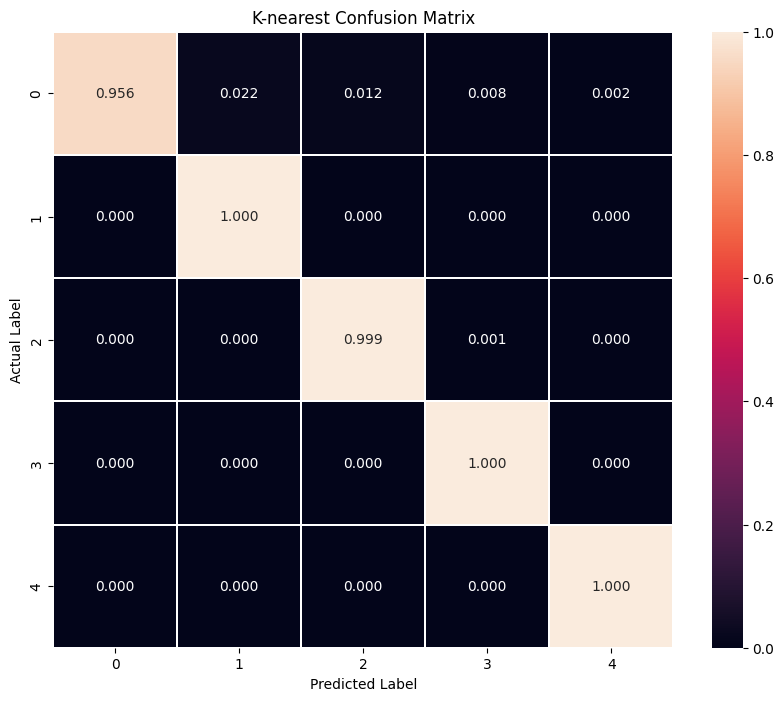

In [66]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_7, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("K-nearest Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

testing (k-nearest)

In [67]:
predict_k_nearest = Model7.model_pred(X_df_test)

In [68]:
accu_knearest, con_mat_knearest, cl_report_knearest, recall_knearest, precision_knearest, F1_score_knearest = Model7.model_report(predict_k_nearest, y_df_test)

In [69]:
print(f"accuracy is: {accu_knearest}")
print(f"Precision: {precision_knearest}")
print(f"Recall: {recall_knearest}")
print(f"F1_Score: {F1_score_knearest}")
print(f"confusion_matrix:\n {np.around(con_mat_knearest, decimals=3)}")
print(f"classification:\n {cl_report_knearest}")

accuracy is: 0.9509409830074913
Precision: 0.9641638742031972
Recall: 0.9509409830074913
F1_Score: 0.9555906624410693
confusion_matrix:
 [[0.955 0.025 0.01  0.007 0.003]
 [0.133 0.82  0.032 0.011 0.004]
 [0.016 0.014 0.941 0.022 0.007]
 [0.068 0.006 0.086 0.84  0.   ]
 [0.012 0.004 0.006 0.002 0.976]]
classification:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     18118
         1.0       0.48      0.82      0.61       556
         2.0       0.86      0.94      0.90      1448
         3.0       0.46      0.84      0.59       162
         4.0       0.95      0.98      0.96      1608

    accuracy                           0.95     21892
   macro avg       0.75      0.91      0.81     21892
weighted avg       0.96      0.95      0.96     21892



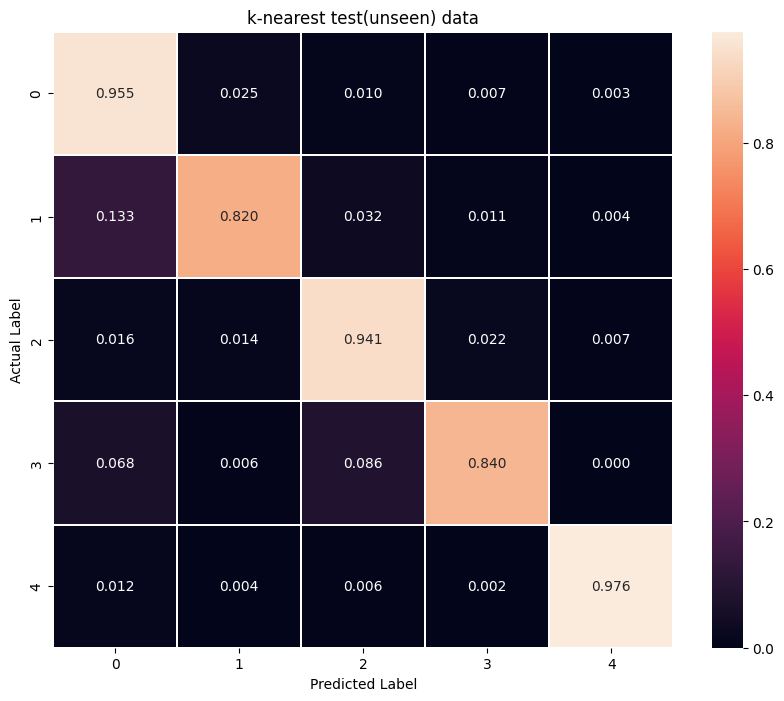

In [70]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_mat_knearest, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("k-nearest test(unseen) data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

PCA

In [ ]:
'''
X_train_pca = PCA(n_components=2).fit_transform(X_train)
X_test_pca = PCA(n_components=2).fit_transform(X_test)
'''

# Hyperparameter Tuning

### RandomSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:

param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'], 
    'C': np.logspace(-4, 4, 20),  
    'penalty': ['l2'],  
}

random_search = RandomizedSearchCV(Model, param_distributions=param_grid, n_iter=60, cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_, y_train_)

print("Best Parameters: ", random_search.best_params_)

y_pred = random_search.predict(X_test_)

accuracy = accuracy_score(y_test_, y_pred)
confusion_mat = confusion_matrix(y_test_, y_pred)
class_report = classification_report(y_test_, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'solver': 'saga', 'penalty': 'l2', 'C': 78.47599703514607}
Accuracy: 0.915881445948261
Confusion Matrix:
[[14309    31   202     7    28]
 [  209   187    21     0     1]
 [  701     4   385    14    16]
 [  102     0    11    39     0]
 [  112     1    13     0  1118]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.84      0.45      0.58       418
         2.0       0.61      0.34      0.44      1120
         3.0       0.65      0.26      0.37       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.65     17511
weighted avg       0.90      0.92      0.91     17511



m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Grid Search CV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
from turtle import mode


param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  
    'C': np.logspace(-4, 4, 20),  
    'penalty': ['l2'],  
}

grid_search = GridSearchCV(Model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_, y_train_)

print("Best Parameters: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test_)

accuracy = accuracy_score(y_test_, y_pred)
confusion_mat = confusion_matrix(y_test_, y_pred)
class_report = classification_report(y_test_, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9159956598709382
Confusion Matrix:
[[14304    31   206     7    29]
 [  208   187    22     0     1]
 [  696     5   388    15    16]
 [   95     0    11    46     0]
 [  113     3    13     0  1115]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.83      0.45      0.58       418
         2.0       0.61      0.35      0.44      1120
         3.0       0.68      0.30      0.42       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.66     17511
weighted avg       0.91      0.92      0.91     17511



# Apply Unsupervised Learning

## MIT-BIH

Drop labels

In [173]:
df1_drop = df1.iloc[:, :-1]
df2_drop = df2.iloc[:, :-1]

In [174]:
df1_labels = df1.iloc[:,-1]
df2_labels = df2.iloc[:,-1]

In [160]:
df1

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [184]:
#df1_drop
#df2_drop

Apply K-means

In [195]:
kmeans = KMeans(n_clusters=5, random_state=42, init = 'k-means++')

In [196]:
labels = kmeans.fit_predict(df1_drop)

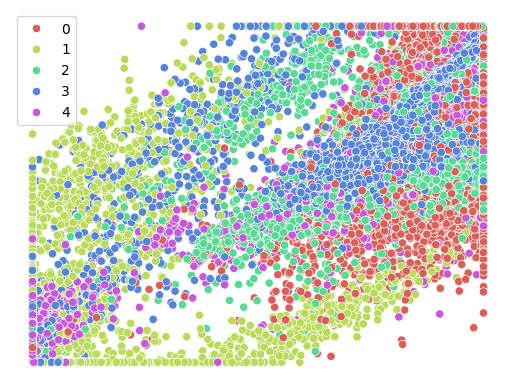

In [197]:
def show_clusters(data, cluster_labels):
    palette = sns.color_palette('hls', n_colors=5)
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=cluster_labels, palette=palette)
    
    plt.axis('off')
    
    plt.show()

show_clusters(df1_drop, labels)


In [189]:
labels2 = kmeans.fit_predict(df2_drop)

In [198]:
accuracy = accuracy_score(df1_labels, labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4513328917011216


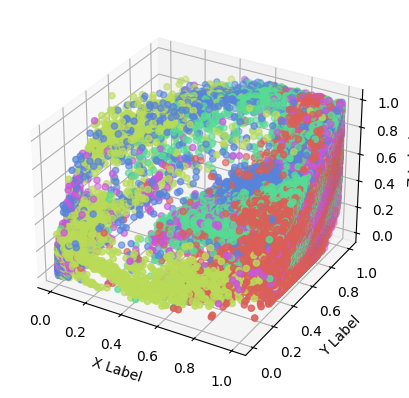

In [199]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_clusters_3d(data, cluster_labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    palette = sns.color_palette('hls', n_colors=5)
    colors = [palette[label] for label in cluster_labels]  # Extract colors based on cluster labels
    
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=colors)
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()

show_clusters_3d(df1_drop, labels)


# Ensemble!

Random Forst

In [14]:
model_random_forest = RandomForestClassifier(random_state=42)

In [15]:
Model8 = Model(model_random_forest, X_train_, X_test_, y_train_, y_test_)
Model8.model_fit(X_train_, y_train_)

In [17]:
prediction8 = Model8.model_pred(X_test_)
model_accu_8, model_con_mat_8, model_cl_report_8, model_recall_8, model_precision_8, model_F1_8 = Model8.model_report(prediction8, y_test_)

In [18]:
print(f"accuracy is: {model_accu_8}")
print(f"Precision: {model_precision_8}")
print(f"Recall: {model_recall_8}")
print(f"F1_Score: {model_F1_8}")
print(f"confusion_matrix:\n {np.around(model_con_mat_8, decimals=3)}")
print(f"classification:\n {model_cl_report_8}")

accuracy is: 0.9753297927017304
Precision: 0.9752572871929448
Recall: 0.9753297927017304
F1_Score: 0.9738369042072211
confusion_matrix:
 [[0.998 0.    0.001 0.    0.   ]
 [0.359 0.627 0.012 0.    0.002]
 [0.119 0.    0.875 0.005 0.001]
 [0.269 0.    0.097 0.634 0.   ]
 [0.042 0.    0.003 0.    0.954]]
classification:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     14579
         1.0       0.99      0.63      0.77       426
         2.0       0.96      0.88      0.92      1112
         3.0       0.91      0.63      0.75       145
         4.0       1.00      0.95      0.98      1249

    accuracy                           0.98     17511
   macro avg       0.97      0.82      0.88     17511
weighted avg       0.98      0.98      0.97     17511



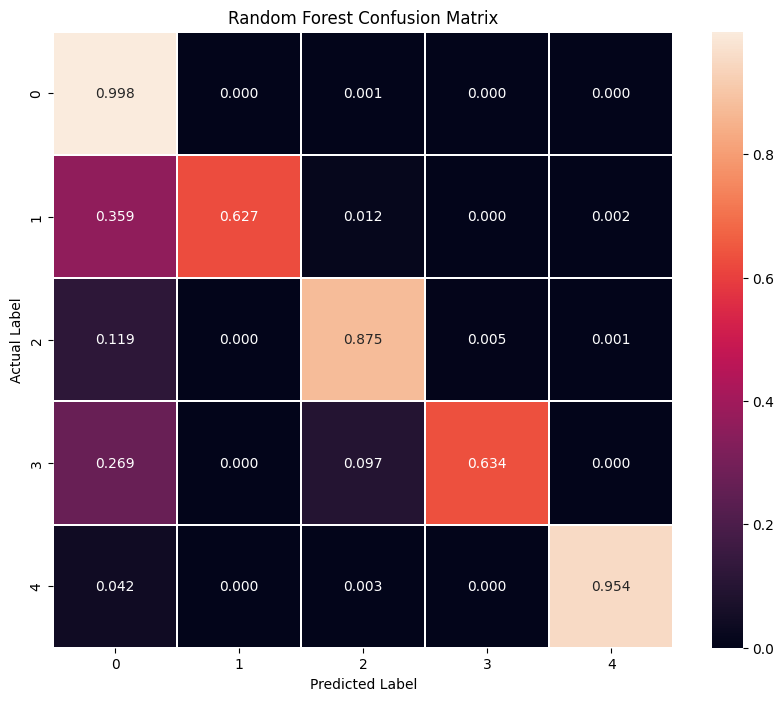

In [71]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_8, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Applying Stratified K-Fold on RFC

In [25]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=False)

###### X1  = df_train.iloc[:,:-1]; y1 = df_train.iloc[:,-1]

In [27]:
rndm_frst_cv_score = cross_val_score(model_random_forest, X1, y1, cv=stratified_k_fold, scoring='accuracy')
print(f"cross validated accuracy: {rndm_frst_cv_score}")

cross validated accuracy: [0.97418765 0.97715722 0.97395923 0.97441608 0.9743004 ]


In [30]:
avg_accu = np.mean(rndm_frst_cv_score)
print(f"{avg_accu}")

0.9748041151321999


Apply SK-fold on Logistic regression

In [28]:
logistic_cv_score = cross_val_score(model_logistic_reg, X1, y1, cv=stratified_k_fold, scoring='accuracy')
print(f"cross validated scores logistic regression: {logistic_cv_score}")

cross validated scores logistic regression: [0.90337502 0.90634458 0.90674433 0.90291817 0.90582524]


In [31]:
avg_accu_2 = np.mean(logistic_cv_score)
print(f"{avg_accu_2}")

0.9050414690793526


Gradient Boosting (using Stacked classify)

In [39]:
model_gradient_boost = GradientBoostingClassifier(n_estimators=50, random_state=42)

In [73]:
base_model = [('rf', model_random_forest),('li', model_logistic_reg)]
meta_model = GradientBoostingClassifier(n_estimators=100, random_state=42) 

In [74]:
stacked_model = StackingClassifier(estimators=base_model, final_estimator=meta_model, cv=5)

In [75]:
stacked_model.fit(X_train_, y_train_)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('li',
                                LogisticRegression(random_state=42,
                                                   solver='liblinear'))],
                   final_estimator=GradientBoostingClassifier(random_state=42))

In [83]:
stacked_score = stacked_model.score(X_test_, y_test_)
print(f"{stacked_score}")

0.9793272799954315


In [81]:
stacked_predict = stacked_model.predict(X_test_)
con_stacked = confusion_matrix(y_test_, stacked_predict, normalize='true')

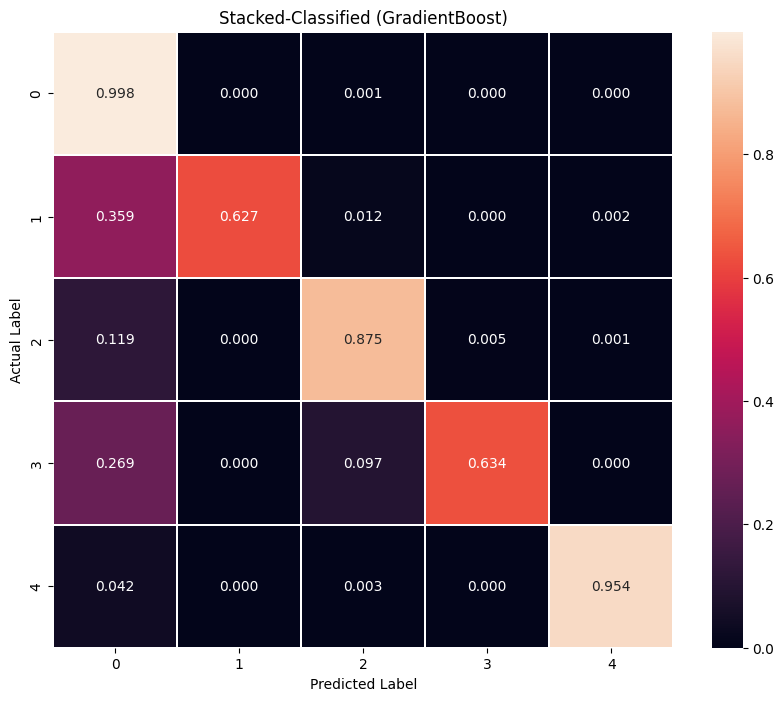

In [82]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(model_con_mat_8, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("Stacked-Classified (GradientBoost)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

XGboost 

In [115]:
model_xgboost = xgb.XGBClassifier()
Model10 = Model(model_xgboost, X_train_, X_test_, y_train_, y_test_)

In [111]:
Model10.model_fit(X_train_, y_train_)

In [112]:
predict_xgboost = Model10.model_pred(X_test_)
accu_xgboost, con_mat_xgboost, cl_report_xgboost, recall_xgboost, precision_xgboost, F1_score_xgboost = Model10.model_report(predict_xgboost, y_test_)

In [113]:
print(f"accuracy is: {accu_xgboost}")
print(f"Precision: {precision_xgboost}")
print(f"Recall: {recall_xgboost}")
print(f"F1_Score: {model_F1_8}")
print(f"confusion_matrix:\n {np.around(con_mat_xgboost, decimals=3)}")
print(f"classification:\n {cl_report_xgboost}")

accuracy is: 0.9801267774541716
Precision: 0.9797467790356416
Recall: 0.9801267774541716
F1_Score: 0.9738369042072211
confusion_matrix:
 [[0.996 0.001 0.002 0.    0.001]
 [0.286 0.702 0.009 0.    0.002]
 [0.076 0.001 0.913 0.007 0.003]
 [0.152 0.    0.09  0.759 0.   ]
 [0.022 0.    0.005 0.    0.973]]
classification:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14579
         1.0       0.95      0.70      0.81       426
         2.0       0.96      0.91      0.93      1112
         3.0       0.89      0.76      0.82       145
         4.0       0.99      0.97      0.98      1249

    accuracy                           0.98     17511
   macro avg       0.95      0.87      0.91     17511
weighted avg       0.98      0.98      0.98     17511



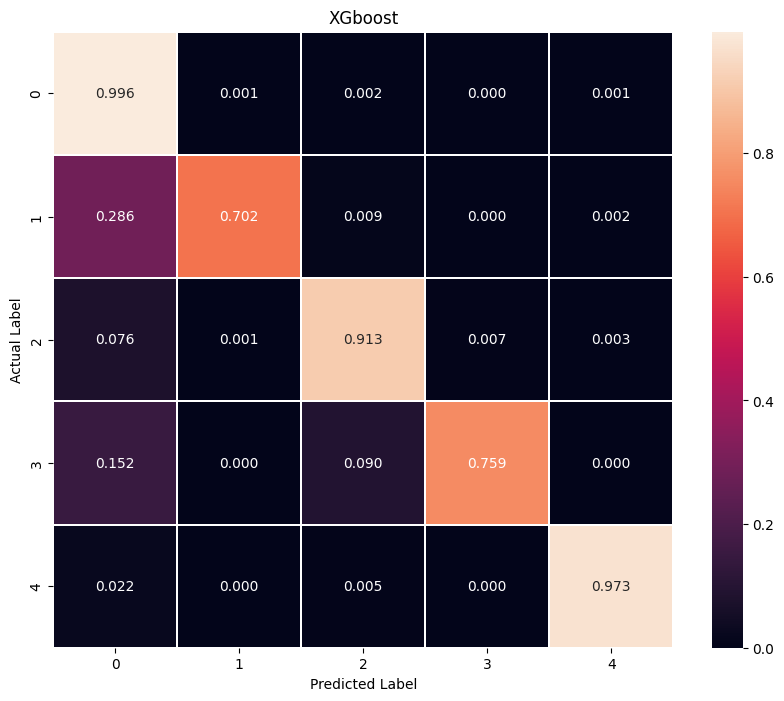

In [114]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_mat_xgboost, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("XGboost")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

assign weights

In [96]:
classes, counts = np.unique(y1, return_counts=True)
class_freq = dict(zip(classes, counts))
print(class_freq)

{0.0: 72471, 1.0: 2223, 2.0: 5788, 3.0: 641, 4.0: 6431}


In [100]:
tot_data_points = sum(class_freq.values())
class_weights = {}
for key, value in class_freq.items():
    class_weights[key] = tot_data_points/(len(class_freq)*value)
#print(tot_data_points)
print(class_weights)

{0.0: 0.24162492583240192, 1.0: 7.877103013945119, 2.0: 3.0253628196268143, 3.0: 27.317940717628705, 4.0: 2.7228735810915876}


In [119]:
weights = np.array([class_weights[label] for label in y_train_])
model_xgboost.fit(X_train_, y_train_, sample_weight=weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [120]:
prediction_xg = model_xgboost.predict(X_test_)

In [121]:
classification_report(y_test_,prediction_xg)

'              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99     14579\n         1.0       0.81      0.82      0.81       426\n         2.0       0.94      0.94      0.94      1112\n         3.0       0.81      0.81      0.81       145\n         4.0       0.98      0.98      0.98      1249\n\n    accuracy                           0.98     17511\n   macro avg       0.91      0.91      0.91     17511\nweighted avg       0.98      0.98      0.98     17511\n'

In [125]:
con_xg = confusion_matrix(y_test_, prediction_xg, normalize='true')

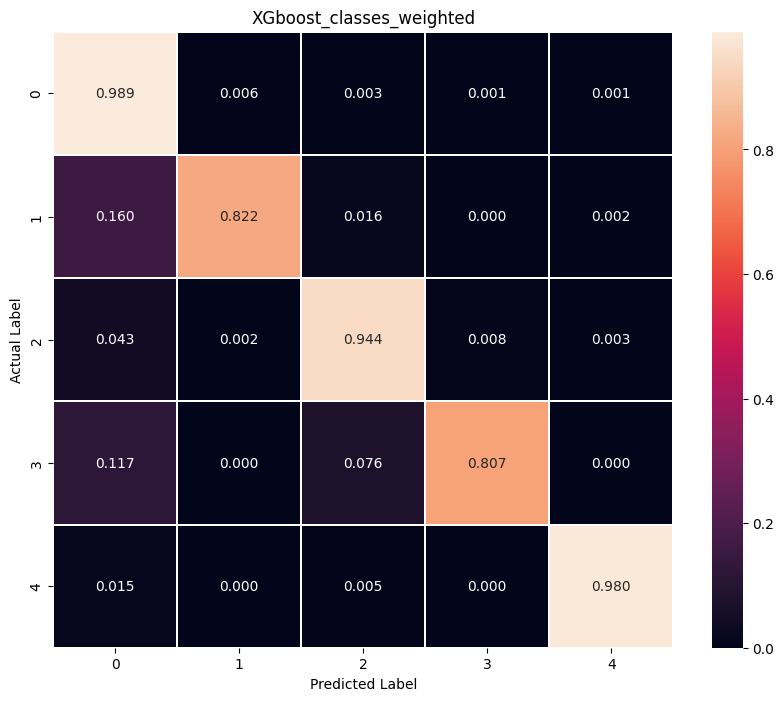

In [126]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_xg, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("XGboost_classes_weighted")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

test XGboost

In [133]:
predict_xg_ud = model_xgboost.predict(X_df_test)

In [137]:
accu_xg_ud = accuracy_score(predict_xg_ud, y_df_test)
con_xg_ud = confusion_matrix( predict_xg_ud, y_df_test, normalize='true')
print(f"accuracy is: {accu_xg_ud}")
print(f"confusion matrix: \n{con_xg_ud}")

accuracy is: 0.980038370180888
confusion matrix: 
[[0.9877304  0.00660248 0.00308116 0.00110041 0.00148556]
 [0.18147448 0.80907372 0.00567108 0.         0.00378072]
 [0.02727273 0.0034965  0.95804196 0.00769231 0.0034965 ]
 [0.08125    0.         0.1        0.81875    0.        ]
 [0.01126408 0.00187735 0.00187735 0.         0.98498123]]


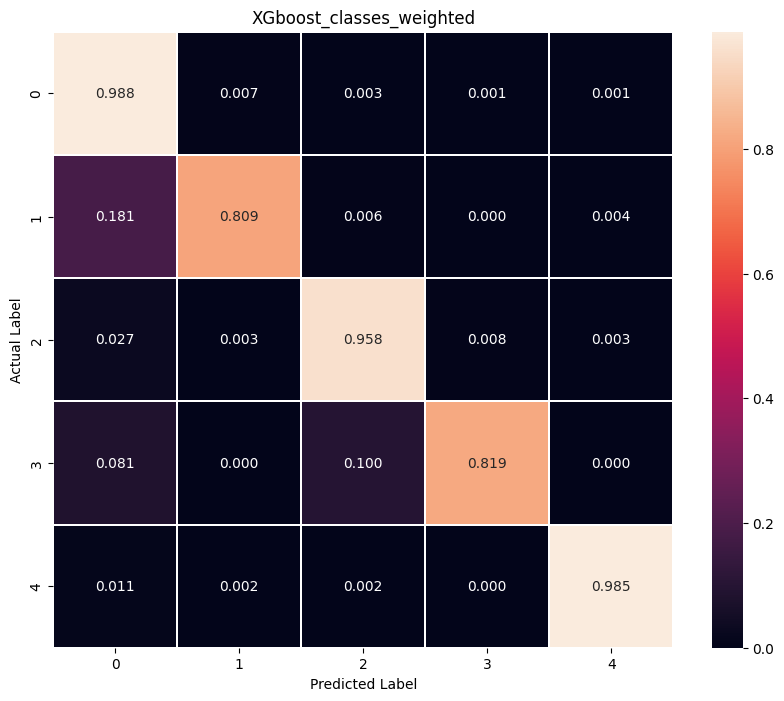

In [138]:
#normalized confusion matrix plot
plt.figure(figsize=(10,8))
sns.heatmap(con_xg_ud, annot=True, linewidths=0.01, fmt = '0.3f')
plt.title("XGboost_classes_weighted")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()